In [2]:
import numpy as np
import pandas as pd
import toolz as tz
import itertools as it
import functools as ft

import rospy
from rosh import Bagy


from robot_wardrive.msg import SignalLocation

# Load Data

In [3]:
ls patrolling_2015-06-08/

2015-06-08-10-52_google.bagy  2015-06-08-10-52_signal_location.bagy
2015-06-08-10-52_google.csv   2015-06-08-15-42_google.bagy
2015-06-08-10-52_mpc.bagy     2015-06-08-15-42_mpc.bagy
2015-06-08-10-52_mpc.csv


In [10]:
def read_bagy(msg_type, bagy_name):
    """Read a single bagy and return it as a pandas.DataFrame."""
    msgs = None
    with Bagy(bagy_name, 'r', msg_type) as bagy:
        msgs = pd.DataFrame([(msg.pose.position.x, msg.pose.position.y, msg.link, msg.level, msg.noise) for msg in bagy], columns=columns)
    return msgs

def read_bagys(msg_type, *bagys):
    """Read several bagys and return them as a pandas.DataFrame."""
    dataframes = (read_bagy(msg_type, bagy) for bagy in bagys)
    return pd.concat(list(dataframes))

In [11]:
columns=['x', 'y', 'link', 'level', 'noise']

bagy_names = ['2015-05-28_signal_location.bagy',
              'patrolling_2015-06-12/2015-06-12-12-11_signal_location.bagy']

msgs = read_bagys(SignalLocation, *bagy_names)
#msgs = msgs[msgs.x != 0.0]   # Remove values where x==0

In [3]:
#msgs = None
#columns=['x', 'y', 'link', 'level', 'noise']
## bagy_name = '2015-05-28_signal_location_trunkated.bagy'
#bagy_name = '2015-05-28_signal_location.bagy'
#with Bagy(bagy_name, 'r', SignalLocation) as bagy:
#    msgs = pd.DataFrame([(msg.pose.position.x, msg.pose.position.y, msg.link, msg.level, msg.noise) for msg in bagy], columns=columns)
    

        
        
        

In [12]:
msgs.head()

,x,y,link,level,noise
0,11.803684,86.801627,44,-66,-256
1,11.807398,86.842084,44,-66,-256
2,11.802938,87.034106,47,-63,-256
3,11.790895,87.047752,47,-63,-256
4,11.797792,87.251747,46,-64,-256


In [13]:
msgs.describe()

,x,y,link,level,noise
count,16699.000000,16699.000000,16699.000000,16699.000000,16699.000000
mean,12.476113,60.814561,49.569435,-45.821965,-237.266423
std,1.408395,27.811761,20.918186,26.413151,66.671695
min,7.915241,4.459185,0.000000,-256.000000,-256.000000
25%,11.852673,35.191291,36.000000,-71.000000,-256.000000
50%,11.991579,60.205485,50.000000,-51.000000,-256.000000
75%,12.280408,85.101373,70.000000,-24.000000,-256.000000
max,19.099892,109.040471,70.000000,0.000000,0.000000


# Plots

#Rounding 

Rounding messages to a meter resolution and geting median link or each square meter.

In [14]:
rounded = msgs.apply(np.round, decimals=0)
rounded = rounded.groupby(['x', 'y']).median().reset_index(inplace=False)
#rounded['link'] = rounded['link'] * -1
rounded.head()

,x,y,link,level,noise
0,8,16,70,-29.0,-256
1,8,17,70,-19.5,-256
2,8,18,24,-86.0,-256
3,9,15,70,-27.5,-256
4,9,16,70,-20.5,-256


## Plot rounded

In [28]:
# Set image limits
extent=[min(rounded.x - 6.55), max(rounded.x + 5.55),
       min(rounded.y - 4.6),max(rounded.y + 11.4)]

In [29]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 22.0)

Populating the interactive namespace from numpy and matplotlib


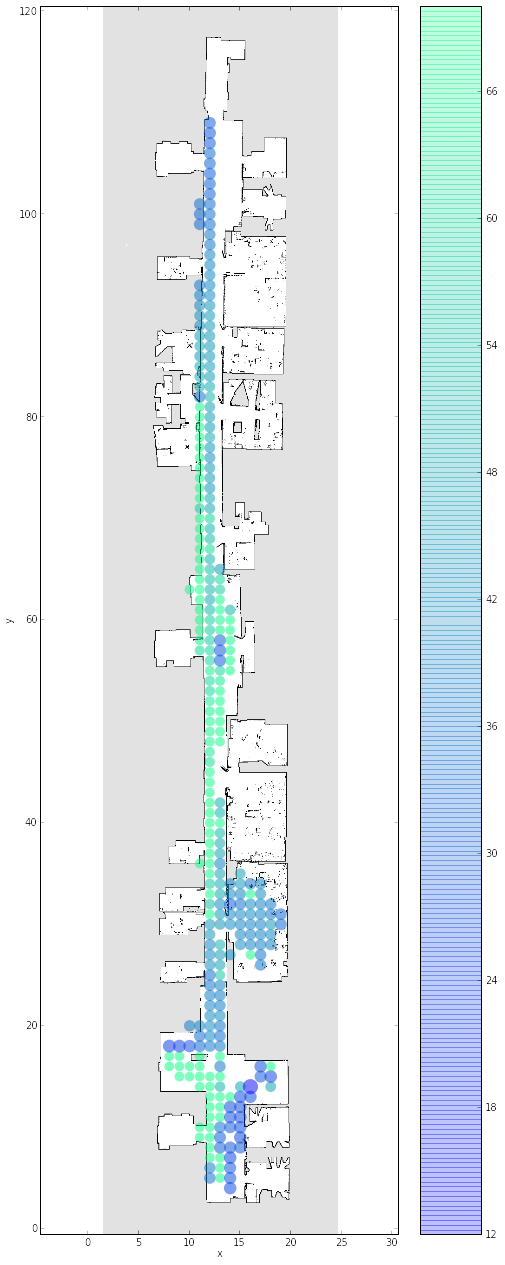

In [38]:
rounded.plot(kind='scatter', x='x', y='y', c='link',
             s=800/np.sqrt(rounded.link), linewidth=0, alpha=0.5,
             grid=None, cmap="winter")  # cmap=*_r is reversed version of the cmap
img = plt.imread('roboticslab_complete_clean.png')
implot = plt.imshow(img, extent=extent, cmap='Greys_r')
axes().set_aspect('equal', 'datalim')
plt.grid(b=None)
plt.savefig('wifi_coverage.pdf', grid=None, transparent=False, dpi=300)